# gtsummaryの表をJupyter Rカーネル上で表示させる方法をいくつか試す。

In [1]:
library(gtsummary)

## 最初に試した方法は、HTMLをIRdisplay::display_html()を用いて表示する方法。

In [2]:
tbl1 <- iris %>% tbl_summary(
  by = Species,
  statistic = list(all_continuous() ~ "{mean} ({sd})"))

### tbl1 を直接表示させようとすると、HTMLが出力される（そうじゃない！）

In [3]:
# tbl1
# コメントアウトを外すと、大量にHTMLソースが表示

### 簡便にtbl1の中身を見たい場合は、tibbleに変換するのが一番楽そう。

In [4]:
tbl1 %>% 
  as_tibble()

**Characteristic**,"**setosa**, N = 50","**versicolor**, N = 50","**virginica**, N = 50"
<chr>,<chr>,<chr>,<chr>
Sepal.Length,5.01 (0.35),5.94 (0.52),6.59 (0.64)
Sepal.Width,3.43 (0.38),2.77 (0.31),2.97 (0.32)
Petal.Length,1.46 (0.17),4.26 (0.47),5.55 (0.55)
Petal.Width,0.25 (0.11),1.33 (0.20),2.03 (0.27)


# as_tibble()ではなくas_kable_extra()を使えば、註釈（この例の場合、"Mean (SD)"）も含めて表示される。

In [5]:
tbl1 %>% 
  as_kable_extra() %>% 
  as.character() %>%
  IRdisplay::display_html()

Characteristic 
 setosa, N = 50 
 versicolor, N = 50 
 virginica, N = 50 
 
 
 
 
 Sepal.Length 
 5.01 (0.35) 
 5.94 (0.52) 
 6.59 (0.64) 
 
 
 Sepal.Width 
 3.43 (0.38) 
 2.77 (0.31) 
 2.97 (0.32) 
 
 
 Petal.Length 
 1.46 (0.17) 
 4.26 (0.47) 
 5.55 (0.55) 
 
 
 Petal.Width 
 0.25 (0.11) 
 1.33 (0.20) 
 2.03 (0.27) 
 
 
 
 1 Mean (SD)

# もっと複雑なデータの場合でも検証する
ここのサンプルデータ: 
https://stackoverflow.com/questions/66552227/r-tbl-summary-knitting-to-pdf-with-gtsummary を用いる

In [6]:
trial12<-structure(list(gender = structure(c(1L, 1L, 1L, 2L, 2L, 1L, 2L, 
2L, 2L, 2L, 2L, 1L, 2L, 1L, 2L, 2L, 2L, 1L, 1L, 2L, 1L, 2L, 2L, 
1L, 2L, 2L, 1L, 2L, 2L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, 2L, 1L, 2L, 
1L, 1L, 2L, 2L, 1L, 2L, 2L, 2L, 1L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 
2L, 1L), .Label = c("Female", "Male"), class = c("labelled", 
"factor"), label = "Gender"), Age = c(34.7479452054795, 54.5178082191781, 
55.6328767123288, 25.4328767123288, 25.5287671232877, 53.1041095890411, 
52.0821917808219, 49.5205479452055, 74.9698630136986, 24.2739726027397, 
34.2657534246575, 58.3095890410959, 21.827397260274, 19.572602739726, 
60.8602739726027, 47.1835616438356, 61.8164383561644, 18.9205479452055, 
56.6438356164384, 66.7780821917808, 41.9698630136986, 27.1095890410959, 
21.0109589041096, 18.0547945205479, 33.5506849315069, 44.0630136986301, 
46.0712328767123, 54.3095890410959, 58.8493150684931, 47.7643835616438, 
54.972602739726, 54.5260273972603, 63.3780821917808, 77.2438356164384, 
29.0301369863014, 21.5068493150685, 45.0328767123288, 55.6602739726027, 
57.7397260273973, 64.2191780821918, 41.4383561643836, 70.1890410958904, 
44.413698630137, 48.5753424657534, 45.5945205479452, 2.81643835616438, 
51.5424657534247, 52.6191780821918, 54.2684931506849, 54.0684931506849, 
67.0493150684931, 34.3917808219178, 55.1534246575342, 35.7232876712329, 
28.6082191780822, 48.9561643835616, 79.6164383561644), length_of_hospital_admissi = structure(c(4, 
8, 39, 43, 34, 18, 55, 14, 11, 58, 24, 16, 24, 43, 22, 59, 28, 
16, 10, 20, 23, 14, 80, 47, 58, 69, 12, 27, 18, 9, 10, 26, 8, 
11, 31, 17, 38, 13, 21, 12, 52, 24, 66, 17, 49, 6, 187, 34, 55, 
15, 19, 92, 50, 51, 6, 27, 37), label = "Length of Admission following Craniectomy", class = c("labelled", 
"numeric")), length_of_admission_follow = structure(c(1, 1, 2, 
3, 14, 5, 23, 2, 4, 4, 6, 8, 3, 1, 2, 4, 6, 1, 3, 2, 3, 2, 13, 
5, 8, 3, 3, 2, 1, 7, 3, 2, 2, 5, 3, 2, 49, 3, 3, 17, 10, 7, 9, 
2, 9, 3, 69, 3, 28, 2, 5, 60, 15, 21, 2, 2, 3), label = "Length of Hospital Admission Following Cranioplasty", class = c("labelled", 
"numeric")), reoperation_prior_to_crani = structure(c(0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), label = "Reoperation Prior to Craniectomy", class = c("labelled", 
"numeric")), how_long_was_the_craniopla = structure(c(170, 150, 
210, 220, 210, 155, 190, 225, 216, 210, 175, 215, 190, 160, 180, 
175, 390, 135, 195, 215, 230, 180, 190, 150, 215, 150, 180, 210, 
200, 265, NA, 180, 230, 210, 210, 210, 160, 150, 200, 149, 102, 
175, 182, 190, 190, 354, 210, 150, 175, 148, 175, 215, 190, 190, 
215, 295, 150), label = "How long was Cranioplasty in minutes", class = c("labelled", 
"numeric")), Smoke = structure(c("Yes", "Yes", "Yes", "No", "No", 
"Yes", "Yes", "No", "No", NA, "Yes", "No", "Yes", "No", "Yes", 
"No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", 
"No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", 
"No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", 
"Yes", "No", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", 
"No", "Yes", "Yes"), label = "Smoking Status", class = c("labelled", 
"character")), tobacco_use_at_time_of_sur = structure(c(2L, 2L, 
3L, 1L, 1L, 3L, 2L, 1L, 1L, NA, 2L, 1L, 2L, 1L, 2L, 1L, 2L, 2L, 
2L, 2L, 3L, 2L, 2L, 1L, 1L, 1L, 2L, 1L, 2L, 1L, 1L, 2L, 1L, 3L, 
1L, 2L, 2L, 1L, 2L, 1L, 1L, 3L, 1L, 2L, 2L, 1L, 1L, 2L, 1L, 2L, 
2L, 1L, 2L, 2L, 1L, 2L, 2L), .Label = c("No", "Yes", "Former"
), class = c("labelled", "factor"), label = "Tobacco Use at Time of Surgery"), 
    Time_To_Cranioplasty = structure(c(65, 7, 84, 193, 20, 167, 
    33, 201, 76, 120, 463, 103, 88, 101, 237, 56, 71, 79, 265, 
    191, 106, 101, 66, 105, 50, 410, 193, 60, 129, 99, 50, 84, 
    91, 76, 72, 116, 82, 65, 194, 27, 42, 77, 78, 97, 75, 95, 
    118, 90, 25, 65, 85, 32, 35, 30, 89, 103, 95), class = c("labelled", 
    "difftime"), units = "days", label = "Time to Cranioplasty in Days"), 
    did_complication_require_e = structure(c(1L, 1L, 1L, NA, 
    NA, 1L, 1L, NA, 1L, NA, NA, 1L, NA, NA, NA, 1L, NA, NA, NA, 
    NA, 1L, 1L, NA, 1L, 1L, 1L, NA, 2L, NA, NA, 2L, NA, NA, NA, 
    1L, 1L, 1L, NA, 1L, 2L, NA, 1L, NA, NA, NA, 2L, NA, NA, 1L, 
    NA, NA, NA, 1L, NA, 1L, 1L, NA), .Label = c("No", "Yes"), class = c("labelled", 
    "factor"), label = "Did Complication Require Explantation"), 
    was_there_a_drain_placed_a = structure(c(1L, 1L, 1L, 2L, 
    2L, 2L, 2L, 2L, 2L, 2L, 2L, 1L, 2L, 2L, 2L, 2L, 2L, 1L, 2L, 
    1L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, 
    2L, 2L, 2L, 2L, 2L, 1L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 
    2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L), .Label = c("No Drain Placed", 
    "Drain Placed"), class = "factor"), defect_circumference = c(33.48, 
    25.1, 38.04, 42.69, 43.14, 40.92, 44.76, 39.65, 41.47, 47.89, 
    47.11, 38.86, 47.23, 38.23, 39.2, 41.61, 39.83, 39.76, 42.53, 
    39.16, 43.98, 40.51, 44.19, 31.05, 43.29, 44.46, 39.07, 46.66, 
    34.67, 44.28, 42, 38.98, 37.01, 35.54, 32.16, 42.39, 41.41, 
    42.07, 39.26, 32.01, 39.54, 36.4, 47.22, 42, 56.73, 30.5, 
    43.41, 38.27, 39.27, 41.84, 39.68, 41.08, 39.4, 41.65, 47.78, 
    39.37, 41.62), if_yes_complications_what___1 = structure(c(2L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L), .Label = c("No Infection", 
    "Infection"), class = c("labelled", "factor"), label = "Infection"), 
    if_yes_complications_what___2 = structure(c(0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
    0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0), label = "Subgaleal/Subcutaenous Fluid Collection", class = c("labelled", 
    "numeric")), if_yes_complications_what___3 = structure(c(1L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 
    1L, 1L, 1L, 2L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 
    1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L), .Label = c("No Resorption", 
    "Resorption"), class = c("labelled", "factor"), label = "Bone Flap Resorption"), 
    if_yes_complications_what___4 = structure(c(0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), label = "Pseudomeningocele", class = c("labelled", 
    "numeric")), if_yes_complications_what___5 = c(0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), if_yes_complications_what___6 = structure(c(1, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), label = "Wound Dehiscence", class = c("labelled", 
    "numeric")), if_yes_complications_what___7 = c(0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), if_yes_complications_what___8 = structure(c(0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), label = "Extra Axial Fluid Collection", class = c("labelled", 
    "numeric")), if_yes_complications_what___9 = structure(c(0, 
    0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), label = "Reccurent CVA", class = c("labelled", 
    "numeric")), if_yes_complications_what___10 = structure(c(0, 
    1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
    1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), label = "Seizure", class = c("labelled", 
    "numeric")), if_yes_complications_what___11 = c(0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), if_yes_complications_what___12 = structure(c(0, 
    1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0), label = "Hydrocephalus", class = c("labelled", 
    "numeric")), if_yes_complications_what___13 = c(0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), if_yes_complications_what___14 = structure(c(0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), label = "Hygroma", class = c("labelled", 
    "numeric")), if_yes_complications_what___15 = c(0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), if_yes_complications_what___16 = c(0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)), row.names = c(NA, 
-57L), class = c("tbl_df", "tbl", "data.frame"))

In [7]:
tbl2 <- tbl_summary(
    trial12,
    by = was_there_a_drain_placed_a,
    statistic = list(all_continuous() ~ "{mean} ({sd})",
                     all_categorical() ~ "{n} / {N} ({p}%)"), 
    missing = "no" # don't list missing data separately
  ) %>%
  add_overall()%>%
  modify_header(label = "**Variable**") %>% # update the column header
  bold_labels() %>%
  modify_spanning_header(c("stat_1", "stat_2") ~ "**Drain**")%>% add_p()

Warning for variable 'length_of_hospital_admissi':
 simpleWarning in wilcox.test.default(x = c(4, 8, 39, 16, 16, 20, 27, 18, 12), : cannot compute exact p-value with ties

Warning for variable 'length_of_admission_follow':
 simpleWarning in wilcox.test.default(x = c(1, 1, 2, 8, 1, 2, 2, 1, 17), y = c(3, : cannot compute exact p-value with ties

Warning for variable 'how_long_was_the_craniopla':
 simpleWarning in wilcox.test.default(x = c(170, 150, 210, 215, 135, 215, 210, : cannot compute exact p-value with ties

Warning for variable 'Time_To_Cranioplasty':
 simpleWarning in wilcox.test.default(x = c(65, 7, 84, 103, 79, 191, 60, 129, 27: cannot compute exact p-value with ties

Warning for variable 'defect_circumference':
 simpleWarning in wilcox.test.default(x = c(33.48, 25.1, 38.04, 38.86, 39.76, 39.16, : cannot compute exact p-value with ties

There was an error in 'add_p()/add_difference()' for variable 'if_yes_complications_what___5', p-value omitted:
Error in stats::chisq.test(x =

エラーがいくつか出ているがここでは気にしないことにする。

# as_tibble()で中身を見る方法。

In [8]:
tbl2 %>% 
  as_tibble() %>% 
  head()

**Variable**,"**Overall**, N = 57","**No Drain Placed**, N = 9","**Drain Placed**, N = 48",**p-value**
<chr>,<chr>,<chr>,<chr>,<chr>
__Gender__,NA,NA,NA,0.048
Female,19 / 57 (33%),6 / 9 (67%),13 / 48 (27%),NA
Male,38 / 57 (67%),3 / 9 (33%),35 / 48 (73%),NA
__Age__,46 (17),52 (15),45 (17),0.12
__Length of Admission following Craniectomy__,33 (29),18 (10),36 (31),0.048
__Length of Hospital Admission Following Cranioplasty__,8 (14),4 (5),9 (14),0.009


# as_kable_extra()でテーブルを註釈込みで確認する方法。

In [9]:
tbl2 %>% 
  as_kable_extra() %>% 
  as.character() %>% 
  IRdisplay::display_html()

Drain 
 
 
 
 Variable 
 Overall, N = 57 
 No Drain Placed, N = 9 
 Drain Placed, N = 48 
 p-value 
 
 
 
 
 __Gender__ 
 
 
 
 0.048 
 
 
 Female 
 19 / 57 (33%) 
 6 / 9 (67%) 
 13 / 48 (27%) 
 
 
 
 Male 
 38 / 57 (67%) 
 3 / 9 (33%) 
 35 / 48 (73%) 
 
 
 
 __Age__ 
 46 (17) 
 52 (15) 
 45 (17) 
 0.12 
 
 
 __Length of Admission following Craniectomy__ 
 33 (29) 
 18 (10) 
 36 (31) 
 0.048 
 
 
 __Length of Hospital Admission Following Cranioplasty__ 
 8 (14) 
 4 (5) 
 9 (14) 
 0.009 
 
 
 __Reoperation Prior to Craniectomy__ 
 5 / 57 (8.8%) 
 0 / 9 (0%) 
 5 / 48 (10%) 
 0.6 
 
 
 __How long was Cranioplasty in minutes__ 
 196 (47) 
 184 (33) 
 198 (50) 
 0.5 
 
 
 __Smoking Status__ 
 32 / 56 (57%) 
 6 / 9 (67%) 
 26 / 47 (55%) 
 0.7 
 
 
 __Tobacco Use at Time of Surgery__ 
 
 
 
 0.8 
 
 
 No 
 24 / 56 (43%) 
 3 / 9 (33%) 
 21 / 47 (45%) 
 
 
 
 Yes 
 27 / 56 (48%) 
 5 / 9 (56%) 
 22 / 47 (47%) 
 
 
 
 Former 
 5 / 56 (8.9%) 
 1 / 9 (11%) 
 4 / 47 (8.5%) 
 
 
 
 __Time to Cranioplasty in Days__ 
 106 (83) 
 83 (55) 
 110 (88) 
 0.4 
 
 
 __Did Complication Require Explantation__ 
 4 / 26 (15%) 
 2 / 6 (33%) 
 2 / 20 (10%) 
 0.2 
 
 
 __defect_circumference__ 
 40.6 (5.0) 
 36.4 (6.0) 
 41.3 (4.5) 
 0.007 
 
 
 __Infection__ 
 
 
 
 0.4 
 
 
 No Infection 
 54 / 57 (95%) 
 8 / 9 (89%) 
 46 / 48 (96%) 
 
 
 
 Infection 
 3 / 57 (5.3%) 
 1 / 9 (11%) 
 2 / 48 (4.2%) 
 
 
 
 __Subgaleal/Subcutaenous Fluid Collection__ 
 4 / 57 (7.0%) 
 0 / 9 (0%) 
 4 / 48 (8.3%) 
 >0.9 
 
 
 __Bone Flap Resorption__ 
 
 
 
 >0.9 
 
 
 No Resorption 
 54 / 57 (95%) 
 9 / 9 (100%) 
 45 / 48 (94%) 
 
 
 
 Resorption 
 3 / 57 (5.3%) 
 0 / 9 (0%) 
 3 / 48 (6.2%) 
 
 
 
 __Pseudomeningocele__ 
 1 / 57 (1.8%) 
 1 / 9 (11%) 
 0 / 48 (0%) 
 0.2 
 
 
 __if_yes_complications_what___5__ 
 0 / 57 (0%) 
 0 / 9 (0%) 
 0 / 48 (0%) 
 
 
 
 __Wound Dehiscence__ 
 3 / 57 (5.3%) 
 2 / 9 (22%) 
 1 / 48 (2.1%) 
 0.062 
 
 
 __if_yes_complications_what___7__ 
 1 / 57 (1.8%) 
 0 / 9 (0%) 
 1 / 48 (2.1%) 
 >0.9 
 
 
 __Extra Axial Fluid Collection__ 
 2 / 57 (3.5%) 
 1 / 9 (11%) 
 1 / 48 (2.1%) 
 0.3 
 
 
 __Reccurent CVA__ 
 3 / 57 (5.3%) 
 2 / 9 (22%) 
 1 / 48 (2.1%) 
 0.062 
 
 
 __Seizure__ 
 13 / 57 (23%) 
 3 / 9 (33%) 
 10 / 48 (21%) 
 0.4 
 
 
 __if_yes_complications_what___11__ 
 0 / 57 (0%) 
 0 / 9 (0%) 
 0 / 48 (0%) 
 
 
 
 __Hydrocephalus__ 
 5 / 57 (8.8%) 
 2 / 9 (22%) 
 3 / 48 (6.2%) 
 0.2 
 
 
 __if_yes_complications_what___13__ 
 0 / 57 (0%) 
 0 / 9 (0%) 
 0 / 48 (0%) 
 
 
 
 __Hygroma__ 
 1 / 57 (1.8%) 
 0 / 9 (0%) 
 1 / 48 (2.1%) 
 >0.9 
 
 
 __if_yes_complications_what___15__ 
 0 / 57 (0%) 
 0 / 9 (0%) 
 0 / 48 (0%) 
 
 
 
 __if_yes_complications_what___16__ 
 1 / 57 (1.8%) 
 0 / 9 (0%) 
 1 / 48 (2.1%) 
 >0.9 
 
 
 
 
 1 n / N (%); Mean (SD) 
 
 2 Fisher's exact test; Wilcoxon rank sum exact test; Wilcoxon rank sum test

### アンダースコア _ などが入りやや見づらい。フォーマットをもう少しきれいに表示できないものか？

# そこで、一度画像として保存して表示する別の方法を提案する

## as_gt()でgtテーブル形式に変換してから、gt::gtsave()で画像として保存

In [10]:
tbl2 %>% 
  as_gt() %>%
  gt::gtsave(file = "./tbl2_output_sample.png")

## 保存した画像を表示

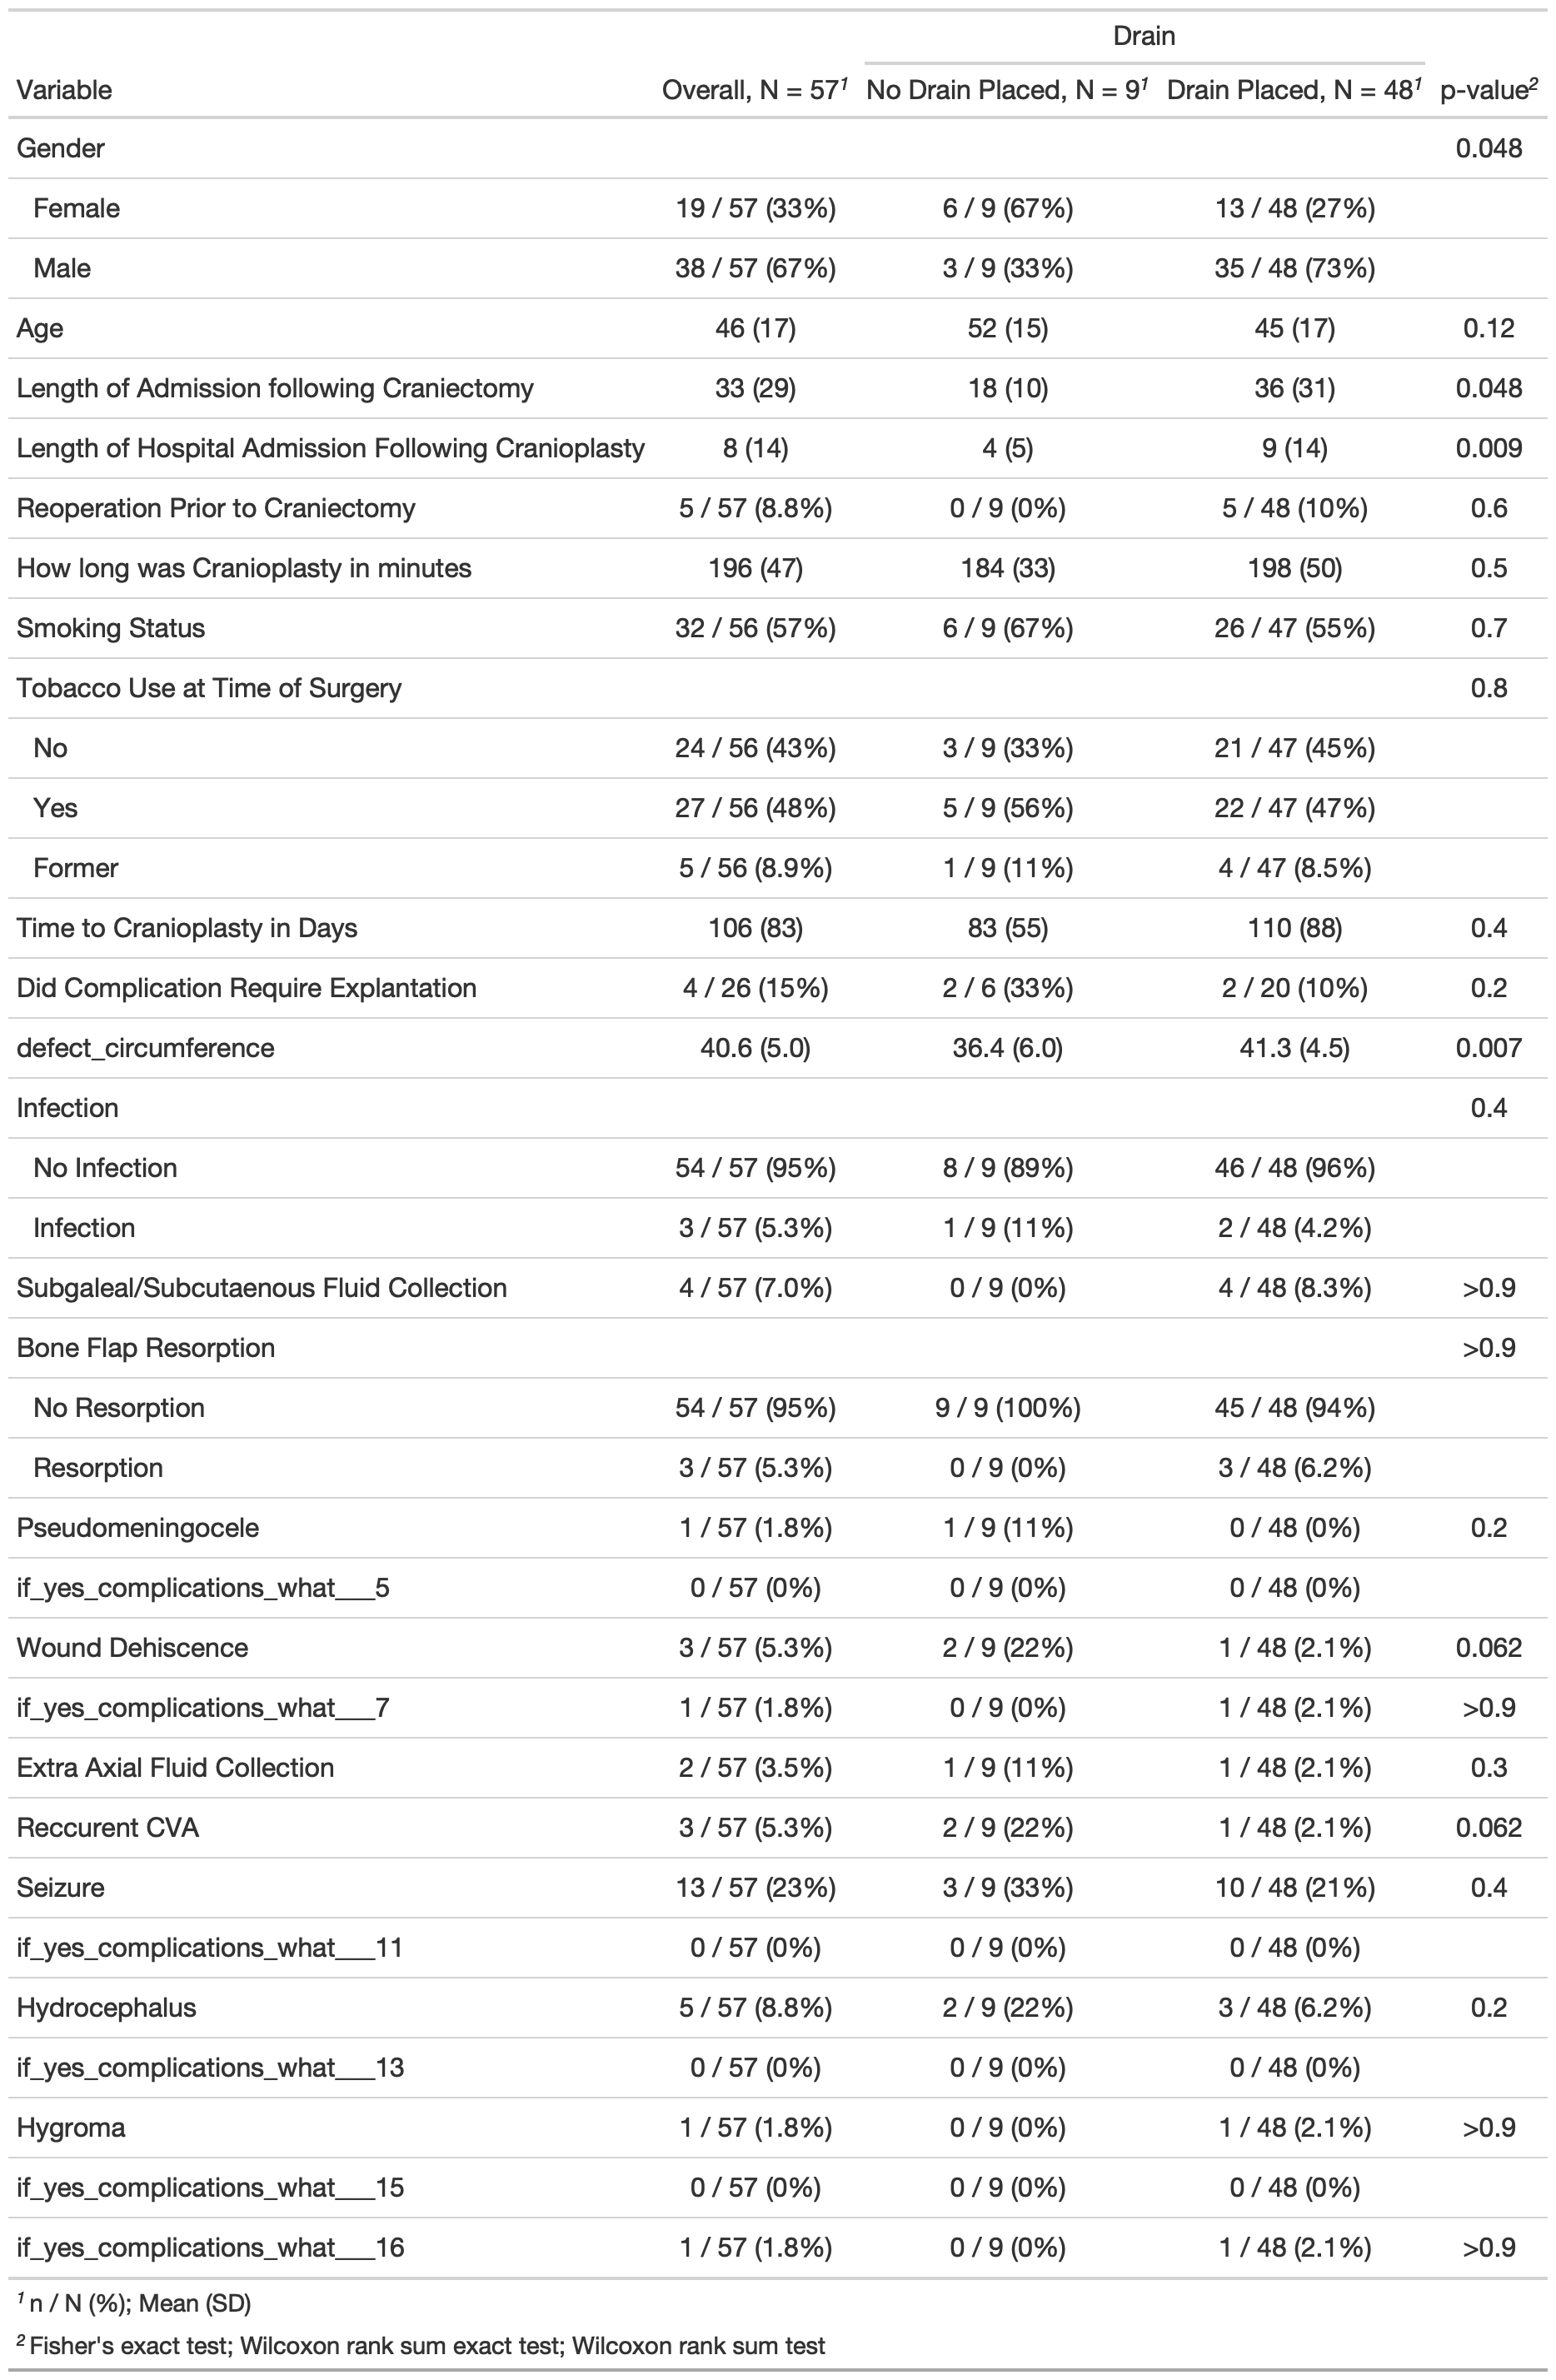

In [12]:
IRdisplay::display_png(file = "./tbl2_output_sample.png")

# 今度はPDFで保存してみる

In [13]:
tbl2 %>% 
  as_gt() %>%
  gt::gtsave(file = "./tbl2_output_sample.pdf")

In [14]:
IRdisplay::display_pdf(file = "./tbl2_output_sample.pdf")

# PDFでも保存して表示させることができた！
GitHub上のプレビューでは見えていないが、ローカルのJupyter環境では表示される。  
表が大きな場合はこちらの方がベターかも。また、pngで保存するよりもファイルサイズが小さくて済む。